In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Rental data

In [5]:
rental_df = pd.read_csv("../data/RentingOutofFlats2024CSV.csv")
rental_df

,rent_approval_date,town,block,street_name,flat_type,monthly_rent
0,2021-01,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2000
1,2021-01,ANG MO KIO,107,ANG MO KIO AVE 4,3-ROOM,1750
2,2021-01,ANG MO KIO,108,ANG MO KIO AVE 4,3-ROOM,1750
3,2021-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2230
4,2021-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2450
...,...,...,...,...,...,...
137225,2024-09,CHOA CHU KANG,765,CHOA CHU KANG NTH 5,4-ROOM,2400
137226,2024-09,WOODLANDS,686A,WOODLANDS DR 73,4-ROOM,3200
137227,2024-09,TOA PAYOH,144,LOR 2 TOA PAYOH,4-ROOM,3500
137228,2024-09,TAMPINES,897,TAMPINES ST 81,5-ROOM,3900


In [6]:
rental_df.shape

(137230, 6)

## Resale flat data

In [7]:
resale_df = pd.read_csv("../data/Resaleflatprices.csv")
resale_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [8]:
resale_df.shape

(192970, 11)

Resale flat data ranges from 2017 to 2024, while rental data ranges from 2021 to 2024. Both are monthly time series data.

Theres no building id in these openly available datasets, so I will need to join on the flat type, street name and block and date

In [17]:
def load_data(df1, df2):
    # Convert month into date
    df1["month"] = pd.to_datetime(df1["month"], format="%Y-%m")

    # Query 2021 onwards for resale flat data to match the time period in rental data
    df1 = df1.query('month >= 2021')

    # Adding a hyphenn for flat type (eg. from 1 ROOM to 1-ROOM)
    df1["flat_type"] = df1["flat_type"].str.replace(" ", "-")
    
    # Inner join rental and resale flat data to get resale flats and their attributes
    merged_df = df2.merge(df1, how="inner", on=["flat_type", "street_name", "block"])
    merged_df = merged_df.drop(columns = ["town_y"])

    # Convert the rent_approval_date to date object
    #merged_df["rent_approval_date"] = pd.to_datetime(merged_df["rent_approval_date"], format = "%Y-%m")
    
    return merged_df


In [18]:
resale_df.shape

(192970, 11)

In [19]:
rental_df.shape

(137230, 6)

In [20]:
df2 = load_data(resale_df, rental_df)

C:\Users\rayne\AppData\Local\Temp\ipykernel_24776\3801895627.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["flat_type"] = df1["flat_type"].str.replace(" ", "-")


In [21]:
df2

,rent_approval_date,town_x,block,street_name,flat_type,monthly_rent,month,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2021-01,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2000,2021-03-01,07 TO 09,92.0,New Generation,1978,56 years 02 months,438000.0
1,2021-01,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2000,2021-06-01,07 TO 09,92.0,New Generation,1978,55 years 11 months,440000.0
2,2021-01,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2000,2022-08-01,01 TO 03,92.0,New Generation,1978,54 years 09 months,475000.0
3,2021-01,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2000,2022-10-01,07 TO 09,92.0,New Generation,1978,54 years 07 months,480000.0
4,2021-01,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2000,2023-06-01,01 TO 03,92.0,New Generation,1978,53 years 11 months,482000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252575,2024-09,HOUGANG,476B,UPP SERANGOON VIEW,5-ROOM,3500,2023-01-01,19 TO 21,115.0,Premium Apartment,2016,92 years 04 months,900000.0
1252576,2024-09,HOUGANG,476B,UPP SERANGOON VIEW,5-ROOM,3500,2023-01-01,07 TO 09,115.0,Premium Apartment,2016,92 years 03 months,846000.0
1252577,2024-09,HOUGANG,476B,UPP SERANGOON VIEW,5-ROOM,3500,2023-11-01,04 TO 06,115.0,Premium Apartment,2016,91 years 05 months,835000.0
1252578,2024-09,HOUGANG,476B,UPP SERANGOON VIEW,5-ROOM,3500,2024-05-01,07 TO 09,115.0,Premium Apartment,2016,91 years,875000.0


## EDA

### monthly_rent column

Distribution of monthly rent

Text(0.5, 1.0, 'Monthly Rent distribution for 2021-2024 Rents')

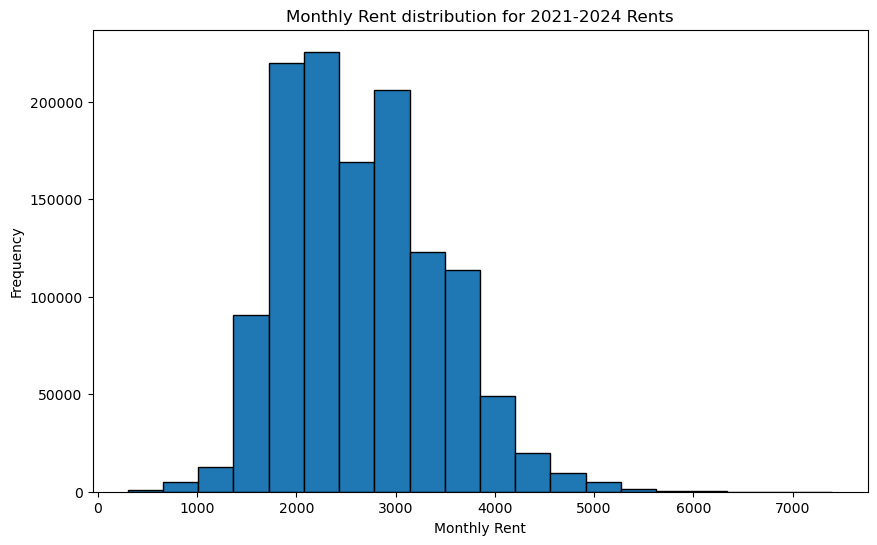

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(df2["monthly_rent"], bins=20, edgecolor="black")
plt.xlabel("Monthly Rent")
plt.ylabel("Frequency")
plt.title("Monthly Rent distribution for 2021-2024 Rents")

Time series of aggregated monthly rent

In [23]:
df2["rent_approval_date"]

0          2021-01
1          2021-01
2          2021-01
3          2021-01
4          2021-01
            ...   
1252575    2024-09
1252576    2024-09
1252577    2024-09
1252578    2024-09
1252579    2024-09
Name: rent_approval_date, Length: 1252580, dtype: object

### town column

In [63]:
df2["town_x"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [62]:
df2["town_x"].value_counts()

town_x
BEDOK              96083
QUEENSTOWN         84941
JURONG WEST        79270
SENGKANG           76522
ANG MO KIO         75815
BUKIT MERAH        73726
TOA PAYOH          69301
KALLANG/WHAMPOA    66891
PUNGGOL            64773
TAMPINES           60896
YISHUN             55189
CLEMENTI           52790
WOODLANDS          50983
HOUGANG            48179
GEYLANG            39019
BUKIT BATOK        38900
CHOA CHU KANG      31098
JURONG EAST        30767
CENTRAL            26351
BUKIT PANJANG      24816
SEMBAWANG          21671
SERANGOON          21239
PASIR RIS          20114
MARINE PARADE      19653
BISHAN             19521
BUKIT TIMAH         4072
Name: count, dtype: int64

c:\Users\rayne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rayne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rayne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


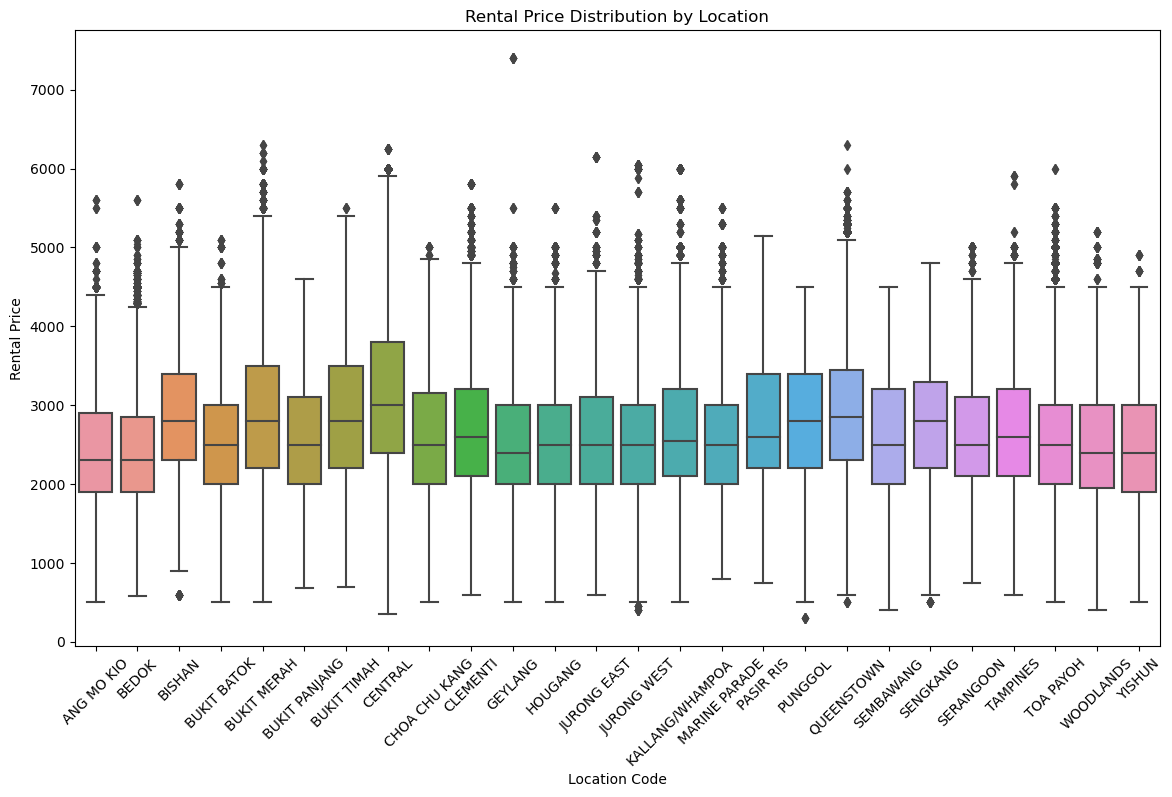

In [73]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='town_x', y='monthly_rent', data=df2)
plt.title('Rental Price Distribution by Location')
plt.xlabel('Location Code')
plt.ylabel('Rental Price')
plt.xticks(rotation=45)
plt.show()

## flat_type column

In [64]:
df2["flat_type"].value_counts()

flat_type
3-ROOM       542822
4-ROOM       414309
5-ROOM       215875
EXECUTIVE     54516
2-ROOM        23874
1-ROOM         1184
Name: count, dtype: int64